# **SIT 215 - Project**

# **Investigating Reinforcement Learning**

## Frozen Lake - Random Agent

### Mir Muhammad Sohaib 
### 220576368

# 1. Dependencies

## 1.1. Installing dependencies

In [1]:
# For using Open AI Gym
!pip install gym 

# For visualising Open AI Gym
!pip install pygame     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 4.1 MB/s 


## 1.2. Importing relevant libraries

In [2]:
# Importing relevant libraries 
import gym 
from random import random, uniform 
import math  
import numpy as np                                 
from random import random 
import matplotlib                          
import matplotlib.pyplot as plt

# 2. Random Agent

In [3]:
# Random Agent
class Random():
    def __init__(self):
        super().__init__()

    # The training action is any random action from within the environment action space
    def action(self, env):
        return env.action_space.sample()

# 3. Driver Class (Helper Methods)

In [4]:
class Driver:

    # Initialise
    def __init__(self, params):
        self.epochs = params['epochs']
        self.env = params['env']
        self.agent = params['agent']
        self.training_rewards = []
        self.evaluation_rewards = []

    # Run random
    def run_frozen_lake_random(self):
        training_action = lambda _observation: self.agent.action(self.env)
        update = lambda _observation, _action, _reward: None
        evaluation_action = training_action

        self.run(training_action, update, evaluation_action)
        
    # Training and evaluation loop, plots then demonstrate
    def run(self, training_action, update, evaluation_action):
        for i in range(self.epochs):
            if ((i + 1) % 1000 == 0):
                print("Progress: {}%".format(100 * (i + 1) // self.epochs))
            self.train_once(training_action, update)
            self.evaluate_once(evaluation_action)

        self.plot()
        
        try:
            self.demonstrate(evaluation_action)
        except NotImplementedError:
            print("Cannot demonstrate: render method on env not implemented.")

    # A single instance of training of the agent in the environment
    def train_once(self, training_action, update):
        observation = self.env.reset()
        done = False
        episode_reward = 0
        while not done:
            action = training_action(observation)
            observation, reward, done, info = self.env.step(action)
            episode_reward += reward
            update(observation, action, reward)
        self.training_rewards.append(episode_reward)

    # A single instance of evaluation of the agent at it's current level of training
    def evaluate_once(self, evaluation_action):
        observation = self.env.reset()
        done = False
        episode_reward = 0
        while not done:
            action = evaluation_action(observation)
            observation, reward, done, info = self.env.step(action)
            episode_reward += reward
        self.evaluation_rewards.append(episode_reward)

    # Plot the training and evaluation reward levels at each epoch
    def plot(self):
        plt.subplot('211')
        plt.plot(self.training_rewards, linewidth=1)
        plt.title('Training reward over time')
        plt.ylabel('Reward')
        plt.xlabel('Iterations')

        plt.subplot('212')
        plt.plot(self.evaluation_rewards, linewidth=1)
        plt.title('Evaluation reward over time')
        plt.ylabel('Reward')
        plt.xlabel('Iterations')
        plt.tight_layout()
        plt.show()
        
    # Use the environments render method and print some additional info to the console. permit user input for repeated demonstrations in a loop
    def demonstrate(self, evaluation_action):
            observation = self.env.reset()
            done = False
            episode_reward = 0
            reward = 0
            step = 0
            while not done:
                print(f"Step: {step} | Cumulative Reward: {episode_reward}")
                step += 1
                print("RENDERING:")
                self.env.render()
                action = evaluation_action(observation)
                print('Observation: ', observation)
                print('Action: ', action)
                print('Reward: ', reward)
                observation, reward, done, info = self.env.step(action)
                episode_reward += reward

# 4. Results

Progress: 100%


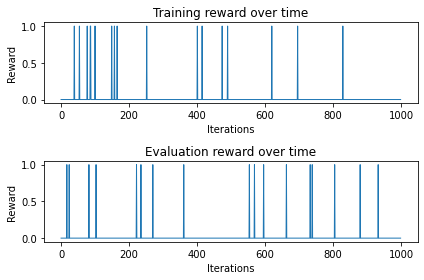

Step: 0 | Cumulative Reward: 0
RENDERING:

SFFF
FHFH
FFFH
HFFG
Observation:  0
Action:  2
Reward:  0
Step: 1 | Cumulative Reward: 0.0
RENDERING:
  (Right)
SFFF
FHFH
FFFH
HFFG
Observation:  0
Action:  0
Reward:  0.0
Step: 2 | Cumulative Reward: 0.0
RENDERING:
  (Left)
SFFF
FHFH
FFFH
HFFG
Observation:  0
Action:  1
Reward:  0.0
Step: 3 | Cumulative Reward: 0.0
RENDERING:
  (Down)
SFFF
FHFH
FFFH
HFFG
Observation:  0
Action:  3
Reward:  0.0
Step: 4 | Cumulative Reward: 0.0
RENDERING:
  (Up)
SFFF
FHFH
FFFH
HFFG
Observation:  1
Action:  2
Reward:  0.0
Step: 5 | Cumulative Reward: 0.0
RENDERING:
  (Right)
SFFF
FHFH
FFFH
HFFG
Observation:  2
Action:  1
Reward:  0.0
Step: 6 | Cumulative Reward: 0.0
RENDERING:
  (Down)
SFFF
FHFH
FFFH
HFFG
Observation:  3
Action:  1
Reward:  0.0


In [5]:
# Providing parameter values to the agent and driver
def frozen_lake_random():
    agent = Random()
    driver = Driver({
        'epochs': 1000,
        'env': gym.make('FrozenLake-v0'),
        'agent': agent,
    })
    driver.run_frozen_lake_random()

if __name__ == '__main__':
    frozen_lake_random()
